<a href="https://colab.research.google.com/github/niubiguy/Estadistics/blob/main/FINAL_EN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib seaborn

In [ ]:
pip install statsmodels

In [ ]:
pip install matplotlib seaborn statsmodels

In [ ]:
pip install scikit-learn

In [ ]:
pip install seaborn matplotlib statsmodels

In [ ]:
pip install seaborn matplotlib

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from seaborn import regplot

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Ingresamos los datos de calibración de la sección 7 de la norma ISO 8466-2
# x: DR en uSv/h
# y: Actividad 131-I en MBq

x = [75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]
y = [236.1, 376.8, 401.5, 605.6, 708.2, 809.8, 1020.6, 1142.1, 1224.3, 1301.8, 1465.8, 1552.6, 1563.5, 1579.8, 1614.9, 1571.1]

data = pd.DataFrame({'x': x, 'y': y})  # Creamos un DataFrame con las variables x e y

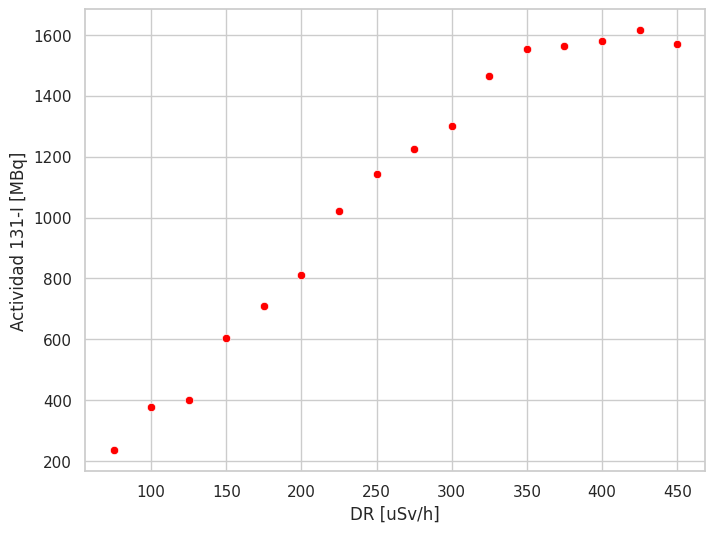

In [ ]:

# Configurar el estilo del gráfico (similar a ggplot2)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crear el gráfico de dispersión
sns.scatterplot(x='x', y='y', data=data, color='red')

# Configurar etiquetas de los ejes
plt.xlabel('DR [uSv/h]')
plt.ylabel('Actividad 131-I [MBq]')

# Mostrar el gráfico
plt.show()


In [ ]:


# Ajustar el modelo lineal
model = sm.OLS(data['y'], sm.add_constant(data['x']))
fit_lineal = model.fit()

# Mostrar el resumen estadístico
print(fit_lineal.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     261.4
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.88e-10
Time:                        20:40:54   Log-Likelihood:                -97.378
No. Observations:                  16   AIC:                             198.8
Df Residuals:                      14   BIC:                             200.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1965     70.739      0.370      0.7

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


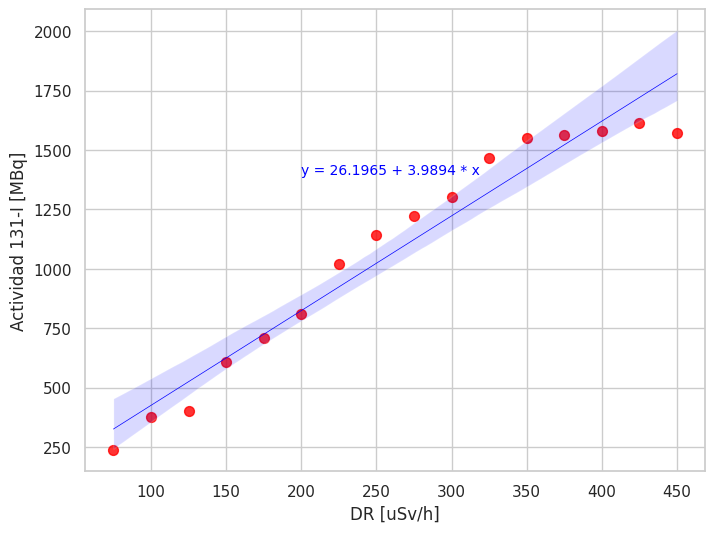

In [ ]:

# Configurar el estilo del gráfico (similar a ggplot2)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crear el gráfico de dispersión con la línea de regresión
regplot(x='x', y='y', data=data, color='red', scatter_kws={'s': 50}, line_kws={'color': 'blue', 'linewidth': 0.5})

# Configurar etiquetas de los ejes
plt.xlabel('DR [uSv/h]')
plt.ylabel('Actividad 131-I [MBq]')

# Ajustar el modelo lineal
model = ols('y ~ x', data=data).fit()

# Agregar la ecuación de regresión al gráfico
equation = f'y = {model.params[0]:.4f} + {model.params[1]:.4f} * x'
plt.text(200, 1400, equation, fontsize=10, color='blue')

# Mostrar el gráfico
plt.show()


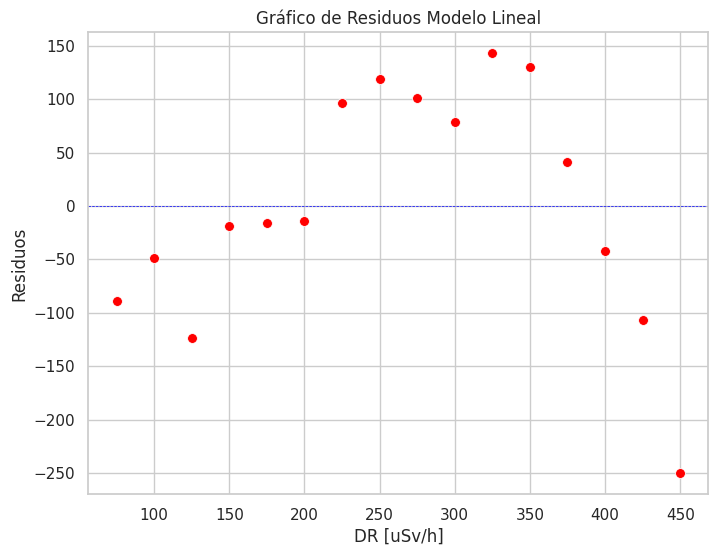

In [ ]:

# Crear un gráfico de residuos
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Obtener los residuos del modelo lineal
residuos = fit_lineal.resid

# Crear un gráfico de dispersión de residuos
sns.scatterplot(x=data['x'], y=residuos, color='red', s=50)

# Configurar etiquetas de los ejes
plt.xlabel('DR [uSv/h]')
plt.ylabel('Residuos')

# Agregar una línea horizontal en y=0 para referencia
plt.axhline(y=0, color='blue', linestyle='--', linewidth=0.5)

# Agregar un título al gráfico
plt.title('Gráfico de Residuos Modelo Lineal')

# Mostrar el gráfico
plt.show()


#Calculando la incertidumbre

### RECTA

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear datos
x = np.array([75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]).reshape(-1, 1)
y = np.array([236.1, 376.8, 401.5, 605.6, 708.2, 809.8, 1020.6, 1142.1, 1224.3, 1301.8, 1465.8, 1552.6, 1563.5, 1579.8, 1614.9, 1571.1])

# Ajustar un modelo lineal
model = LinearRegression().fit(x, y)

# Simular un valor de respuesta de la muestra problema (y0)
y0 = 1000

# Realizar la inversión de la predicción
x0 = (y0 - model.intercept_) / model.coef_[0]

# Calcular la incertidumbre estándar de la predicción
residuals = y - model.predict(x)
mse = mean_squared_error(y, model.predict(x))
se_x0 = np.sqrt(mse * (1/len(y) + (np.mean(x) - x0)**2 / np.sum((x - np.mean(x))**2)))

# Mostrar el resultado
print(f"DR de la muestra problema (x0): {x0:.4f} ± {se_x0:.4f}")


DR de la muestra problema (x0): 244.0995 ± 26.9368


## NO LINEAL

In [ ]:
import numpy as np
import statsmodels.api as sm

# Crear datos
x = np.array([75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450])
y = np.array([236.1, 376.8, 401.5, 605.6, 708.2, 809.8, 1020.6, 1142.1, 1224.3, 1301.8, 1465.8, 1552.6, 1563.5, 1579.8, 1614.9, 1571.1])

# Ajustar un modelo cuadrático
X = sm.add_constant(np.column_stack((x, x**2)))
fit_nolineal = sm.OLS(y, X).fit()

# Mostrar el resumen del ajuste
print(fit_nolineal.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     474.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           7.08e-13
Time:                        20:40:57   Log-Likelihood:                -86.779
No. Observations:                  16   AIC:                             179.6
Df Residuals:                      13   BIC:                             181.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -403.2363     81.047     -4.975      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


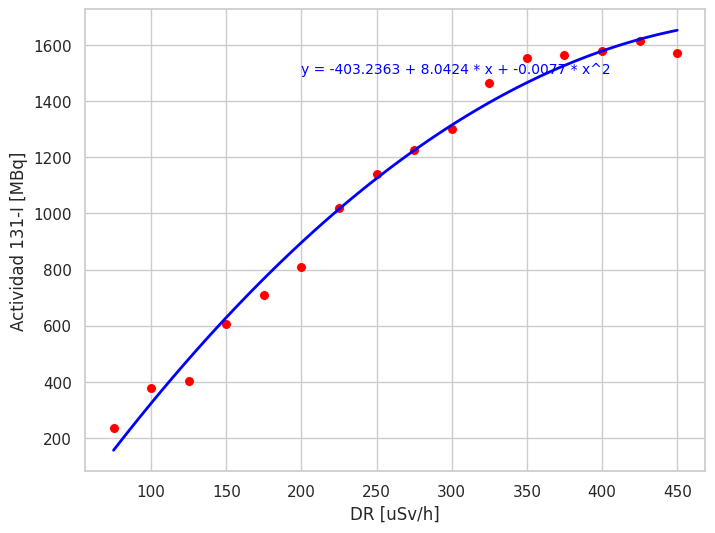

In [ ]:
# Crear datos
x = np.array([75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450])
y = np.array([236.1, 376.8, 401.5, 605.6, 708.2, 809.8, 1020.6, 1142.1, 1224.3, 1301.8, 1465.8, 1552.6, 1563.5, 1579.8, 1614.9, 1571.1])

# Ajustar un modelo cuadrático
X = sm.add_constant(np.column_stack((x, x**2)))
fit_nolineal = sm.OLS(y, X).fit()

# Crear un DataFrame para predecir valores
df_pred = pd.DataFrame({'x': np.linspace(min(x), max(x), 100)})

# Añadir la columna cuadrática
df_pred['x2'] = df_pred['x']**2

# Predecir valores usando el modelo cuadrático
df_pred['y_pred'] = fit_nolineal.predict(sm.add_constant(df_pred[['x', 'x2']]))

# Configurar el estilo del gráfico (similar a ggplot2)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crear el gráfico de dispersión con la curva de calibración no lineal
sns.scatterplot(x=x, y=y, color='red', s=50)
sns.lineplot(x=df_pred['x'], y=df_pred['y_pred'], color='blue', linewidth=2)

# Configurar etiquetas de los ejes
plt.xlabel('DR [uSv/h]')
plt.ylabel('Actividad 131-I [MBq]')

# Agregar la ecuación de la curva cuadrática al gráfico
equation = f'y = {fit_nolineal.params[0]:.4f} + {fit_nolineal.params[1]:.4f} * x + {fit_nolineal.params[2]:.4f} * x^2'
plt.text(200, 1500, equation, fontsize=10, color='blue')

# Mostrar el gráfico
plt.show()


In [ ]:
# Crear datos
x = np.array([75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450])
y = np.array([236.1, 376.8, 401.5, 605.6, 708.2, 809.8, 1020.6, 1142.1, 1224.3, 1301.8, 1465.8, 1552.6, 1563.5, 1579.8, 1614.9, 1571.1])

# Ajustar modelos
fit_lineal = sm.OLS(y, sm.add_constant(x)).fit()
fit_nolineal = sm.OLS(y, sm.add_constant(np.column_stack((x, x**2)))).fit()

# Realizar el test de Mandel
anova_result = anova_lm(fit_lineal, fit_nolineal)
print(anova_result)


   df_resid            ssr  df_diff        ss_diff          F    Pr(>F)
0      14.0  181133.100191      0.0            NaN        NaN       NaN
1      13.0   48149.345147      1.0  132983.755044  35.904721  0.000045


##METODO ISO

In [ ]:
import numpy as np
from scipy.stats import t
from statistics import mean

N = len(x) # Número de calibrantes
N_hat = 1 # Número de replicados de la muestra problema
# Cálculos
Qxx = np.sum(x**2) - (np.sum(x)**2) / N
Qx3 = np.sum(x**3) - (np.sum(x) * np.sum(x**2)) / N
Qx4 = np.sum(x**4) - np.sum(x**2)**2 / N
# Coeficientes del ajuste cuadrático
a = fit_nolineal.params[0]
b = fit_nolineal.params[1]
c = fit_nolineal.params[2]
# Residual standard error
s_y = fit_nolineal.resid.std()
# T de Student
t_value = t.ppf(0.975, N - 3)
# Señal instrumental de la muestra problema
y0 = 1000
# Concentración de la muestra
x_hat = (-b + np.sqrt(b**2 - 4 * (a - y0) * c)) / (2 * c)

# Cálculo final
Ix = (s_y * t_value) / (b + 2 * c * x_hat) * np.sqrt(
    1 / N + 1 / N_hat + ((x_hat - np.mean(x))**2 * Qx4 + (x_hat**2 - np.sum(x**2) / N)**2 * Qxx -
    2 * (x_hat - np.mean(x)) * (x_hat**2 - np.sum(x**2) / N) * Qx3) /
    (Qx4 * Qxx - Qx3**2)
)
print(Ix)

27.27544542780038


In [ ]:
Ix/t_value

12.625366206007355

### GUIA GUM

In [ ]:
# Parámetros del modelo
a = fit_nolineal.params[0]
b = fit_nolineal.params[1]
c = fit_nolineal.params[2]

# Desviaciones estándar de los parámetros
ua = fit_nolineal.bse[0]
ub = fit_nolineal.bse[1]
uc = fit_nolineal.bse[2]


In [ ]:
# Desviación estándar de los residuos
uy0 = fit_nolineal.resid.std()

# Valor de la señal instrumental
y0 = 1000

In [ ]:
import statsmodels.api as sm

# Ajuste cuadrático y resumen
X = sm.add_constant(data['x'])
X['x_squared'] = data['x']**2

model = sm.OLS(data['y'], X).fit()

# Imprimir el resumen
print(model.summary())



In [ ]:
import uncertainties as uct
import numpy as np

# Parámetros del modelo
a = model.params[0]
b = model.params[1]
c = model.params[2]

# Incertidumbres estándar de a, b y c obtenidas con el método summary
ua = model.bse[0]
ub = model.bse[1]
uc = model.bse[2]

uy0 = model.mse_resid**0.5
y0 = 1000  # Dato del problema, es decir, la absorbancia de la muestra

# Definimos la ecuación de medición
expr = (-b + (np.sqrt(b**2 - 4 * (a - y0) * c))) / (2 * c)

# Creamos un diccionario con los valores de cada X input
x = {'a': a, 'b': b, 'c': c, 'y0': y0}

# Lista de incertidumbres estándar de cada X input
u = [ua, ub, uc, uy0]

# Usamos el método GUM
u_GUM = uct.correlated_values(expr, x, u)

# Mostramos las incertidumbres resultantes
print(u_GUM)


In [ ]:
u_GUM

#MONTECARLO

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(123)  # Para obtener los mismos resultados

# Generamos n muestras aleatorias multivariadas
muestra_MC = np.random.multivariate_normal([a, b, c, y0], v, size=10000)

# Asignamos nombres a las columnas (solo para aspectos visuales)
column_names = ['a', 'b', 'c', 'y0']
muestra_MC = pd.DataFrame(muestra_MC, columns=column_names)

# Mostramos las primeras 6 simulaciones
print(muestra_MC.head())
